Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.
● Build data profiles and tables - Inferential statistics
● Explore data relationships - Data visualization
● Feature Selection and Engineering

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the preprocessed data
filename = "./data/processed/college.filtered.csv"
data = pd.read_csv(filename, dtype={'OPEID':object, 'Zip':object})
data.head()

,Unnamed: 0,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,...,MedianDebtNotComplete,PercentReceiveFedLoan,AvgAgeEntry,PercentFemale,PercentMarried,PercentDependent,PercentVeteran,AvgFamilyIncome,MedianFamilyIncome,MedianHouseholdIncome
0,0,1,01230800,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,361126613,NaN,True,1,Predominantly associate's-degree granting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,00100200,ALABAMA A & M UNIVERSITY,NORMAL,35762,NaN,True,1,Predominantly bachelor's-degree granting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,00105200,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,352940110,NaN,True,2,Predominantly bachelor's-degree granting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,00574900,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,36360,NaN,True,1,Predominantly certificate-degree granting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,02503400,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,361173553,NaN,True,1,Predominantly bachelor's-degree granting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Build data profiles and tables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124699 entries, 0 to 124698
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    124699 non-null  int64  
 1   Id                            124699 non-null  int64  
 2   OPEID                         124699 non-null  object 
 3   Name                          124699 non-null  object 
 4   City                          124699 non-null  object 
 5   Zip                           124699 non-null  object 
 6   Predominant degree            101334 non-null  float64
 7   Main branch                   124699 non-null  bool   
 8   NumBranches                   124699 non-null  int64  
 9   Primary degree type           124699 non-null  object 
 10  High degree                   124699 non-null  object 
 11  Control                       124676 non-null  object 
 12  StateCode                     124669 non-nul

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,124699.0,62349.000000,35997.644946,0.000000,31174.500000,62349.000000,93523.500000,1.246980e+05
Id,124699.0,62350.000000,35997.644946,1.000000,31175.500000,62350.000000,93524.500000,1.246990e+05
Predominant degree,101334.0,1.971628,0.876321,1.000000,1.000000,2.000000,3.000000,3.000000e+00
NumBranches,124699.0,3.737648,12.623389,1.000000,1.000000,1.000000,2.000000,1.410000e+02
AdmissionRate,34156.0,0.696963,0.223910,0.000000,0.555600,0.721100,0.861525,1.000000e+01
ACTMidpoint,15871.0,22.722954,3.265049,2.000000,21.000000,22.000000,24.000000,3.500000e+01
SATAvg,18598.0,1052.701043,126.892749,514.000000,970.000000,1035.000000,1115.000000,1.599000e+03
Enrollment-DegreeSeeking,110343.0,2151.355673,4734.967374,0.000000,115.000000,490.000000,1989.000000,2.535940e+05
NetPrice-Private,18560.0,17982.273545,7462.132716,-103168.000000,13120.750000,18179.500000,22487.000000,8.757000e+04
AvgCost-AY,20504.0,23002.166699,11575.691881,2200.000000,13293.000000,21395.500000,29439.500000,7.447300e+04


In [5]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                               Count   Percent
Predominant degree             23365  0.187371
Control                           23  0.000184
StateCode                         30  0.000241
Region                            30  0.000241
AdmissionRate                  90543  0.726092
ACTMidpoint                   108828  0.872726
SATAvg                        106101  0.850857
Enrollment-DegreeSeeking       14356  0.115125
NetPrice-Private              106139  0.851162
AvgCost-AY                    104195  0.835572
TuitionRevenue/FTE             18644  0.149512
Expenditure/FTE                18650  0.149560
AvgFaculty Salary              55047  0.441439
Percent Fulltime Faculty       63748  0.511215
Completion-4yr                 89819  0.720286
Completion<4yr                 63229  0.507053
RetentionFT-4yr               101800  0.816366
RetentionFT-<4yr               87419  0.701040
RetentionPT-4yr               109322  0.876687
RetentionPT-<4yr              102212  0.819670
PercentFedLoa

## Explore number of schools
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [53]:
n_data = data.shape[0]
print("There are ", n_data, " observations in the data")


n_opeid = data["OPEID"].nunique()
print("There are ", n_opeid, "unique OPEID in the data")
print(data.OPEID.value_counts())


n_schools = data['Name'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.Name.value_counts())

There are  124699  observations in the data
There are  11511 unique OPEID in the data
00224900    37
00147900    23
00104700    23
03030800    21
00363600    21
            ..
012166A1     1
04193800     1
32098825     1
04218000     1
03082500     1
Name: OPEID, Length: 11511, dtype: int64
There are  20601 unique school names in the data
ITT TECHNICAL INSTITUTE                               593
EMPIRE BEAUTY SCHOOL                                  189
MARINELLO SCHOOL OF BEAUTY                            107
ROSS MEDICAL EDUCATION CENTER                         106
Marinello School of Beauty                            105
                                                     ... 
Putnam Westchester BOCES-Practical Nursing Program      1
EMPIRE BEAUTY SCHOOL-POTTSTOWN                          1
Hawaii Business College                                 1
ADVANCED HAIR TECHNOLOGY                                1
Universal Training Institute                            1
Name: Name, Length: 2

In [58]:
#How many school names are unique - occur only once in the database?
print(data.Name.value_counts(ascending = True))

Universal Training Institute                            1
ADVANCED HAIR TECHNOLOGY                                1
Hawaii Business College                                 1
EMPIRE BEAUTY SCHOOL-POTTSTOWN                          1
Putnam Westchester BOCES-Practical Nursing Program      1
                                                     ... 
Marinello School of Beauty                            105
ROSS MEDICAL EDUCATION CENTER                         106
MARINELLO SCHOOL OF BEAUTY                            107
EMPIRE BEAUTY SCHOOL                                  189
ITT TECHNICAL INSTITUTE                               593
Name: Name, Length: 20601, dtype: int64


## Explore CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- Does this relate to main branch vs non?
- How does this relate to control?

In [49]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

print(data['CURROPER'])

num_closed = data[data['CURROPER']].sum()
print('Closed:  ', num_closed)

#total = num_open + num_closed
#if total == data.shape[0]:
#    print('Open: ', num_open, ' Closed: ', num_closed)
#else:
#    print('Math error')

# How many unique OPEIDs are represented?
#opeid_closed = data['CURROPER'].groupby(data['OPEID']).sum()
#opeid_closed.head()
# How many school names are represented?


SyntaxError: invalid syntax (<ipython-input-49-c76e5254c7b7>, line 6)

Text(0.5, 1.0, 'Boxplots of Percent First Generation students by School type')

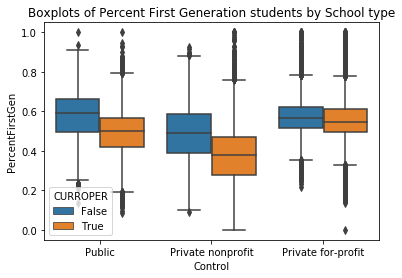

In [16]:
#Choose columns with >15% missing values that might be intersting to explore
to_explore = ['PercentFirstGen', 'AvgIncomeDependent','AvgIncomeIndep', 'PercentIndependent', 'TuitionRevenue/FTE', 'Expenditure/FTE', 'Enrollment-DegreeSeeking']

#Create boxplots of the colunms
sns.boxplot('Control', 'PercentFirstGen', data=data, hue = 'CURROPER')

plt.title('Boxplots of Percent First Generation students by School type')

Comments - Close schools have slightly lower first generation percentages than open schools for all three types of schools. Nonprofit private schools have lower first gen percentages than public and private-for-profit schools

Text(0.5, 1.0, 'Boxplots of Student Enrollment by School type')

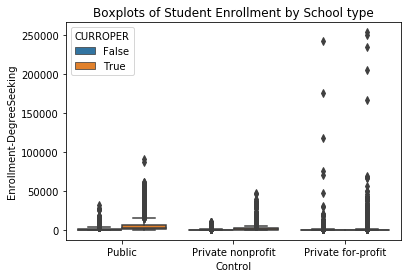

In [12]:
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Boxplots of Student Enrollment by School type')

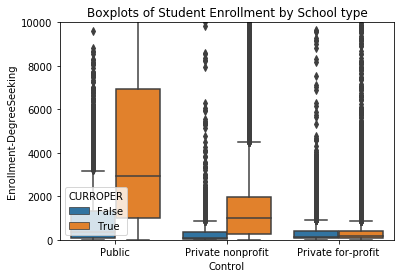

In [25]:
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Boxplots of Student Enrollment by School type')
plt.ylim((0,10000))
plt.show()

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Text(0.5, 1.0, 'Boxplots of Tuition Revene per student by School type')

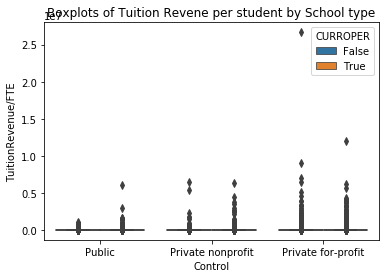

In [13]:
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition Revene per student by School type')

Private-for profit school has an extreme outlier - which school is it?

Text(0.5, 1.0, 'Boxplots of Expenditure per student by School type')

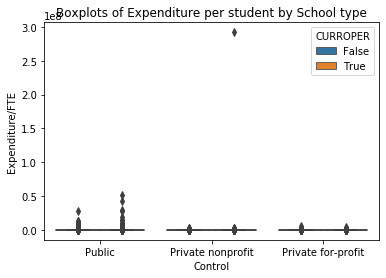

In [28]:
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Expenditure per student by School type')

Extreme outlier in closed nonprofit private school is distorting the data.

### Inferential Statistics Hint: 
Do any particular results in your data strike you as [abnormal]? What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test? Take some time to recall your statistical concepts, such as that the [p-value] of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis.

Private-for profit school has an extreme outlier - which school is it?

Text(0.5, 1.0, 'Boxplots of Expenditure per student by School type')

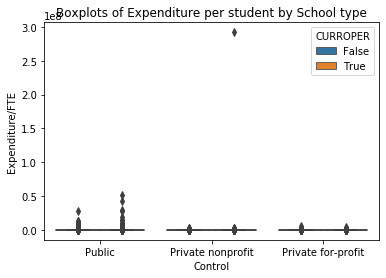

In [ ]:
Extreme outlier in closed nonprofit private school is distorting the data.

## Explore data relationships

### Data Visualization Hint: 
Recall your [matplotlib] and [seaborn] functions for data visualization: 
Matplotlib:
- plt.plot()
- plt.xlabel() 
- plt.show() 
- plt.hist(),
Seaborn:
- sns.relplot() 
- sns.lmplot() 
- sns.catplot().

### Feature Selection and Engineering Hint: 
Feature selection is where data storytelling starts: we tell a story as soon as we include certain features and omit others. But how we manipulate - or engineer - those fields is just as important. Recall the crucial elements to feature engineering:
- If you have categorical features, you might need to [one-hot encode] them
- You may need to [binarize] your columns and [bin] your values.
- To handle missing data, think about how appropriate the methods of [listwise
deletion, data imputation, replacing missing values with constants] or simply attempting to [find the missing values] are for your data.
- Think about whether you need to [standardize, log-transform or normalize] your data, as well as statistically valid ways to remove outliers.

## Questions to answer
Are there variables that are particularly significant in terms of explaining the answer to your project question?
● Are there significant differences between subgroups in your data that may be relevant to your project aim?
● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
● What are the most appropriate tests to use to analyze these relationships?